<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0718_48%EC%9D%BC%EC%B0%A8_AI(graphviz%2C_feature_importances_%2Cmake_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

min_samples_split: 분할되기위해 노드가 가져야 할 최소 샘플수

min_samples_leaf : 리프노드가 가지고 있어야할 최소 샘플 수

max_features : 각 노드에서 분할에 사용할 특성의 최대수

max_leaf_nodes: 리프 노드의 최대수

max_depth : 트리의 최대 깊이 설정

criterion='gini' : 정보의 균일도 측정 방법

In [1]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size =0.2 , random_state =11)

In [4]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names, \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [7]:
np.round(1-((41/120)**2 + (40/120)**2 + (39/120)**2), 3)

0.667

#지니계수란?
$$
G = 1 - {\sum^c _j=1} {(nj \over n)}^2
$$

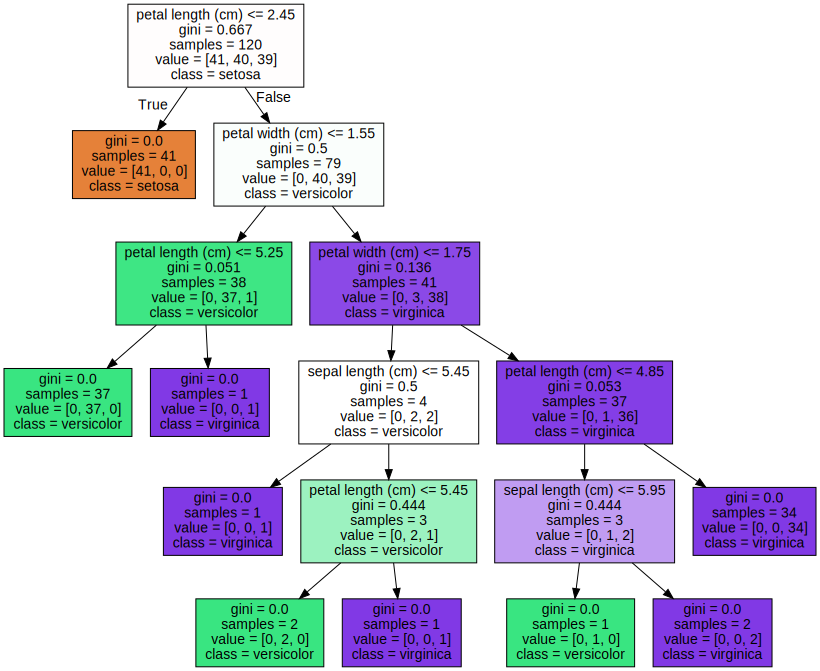

In [6]:
import graphviz

#위에서 생성된 tree.dot파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [10]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names, \
feature_names = iris_data.feature_names, impurity=True, filled=True)

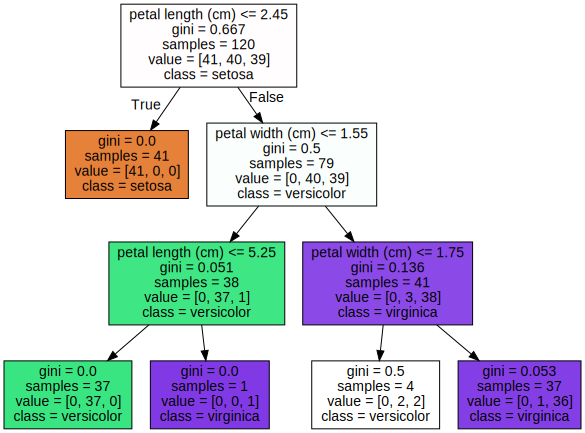

In [11]:
import graphviz

#위에서 생성된 tree.dot파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [14]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [15]:
import seaborn as sns

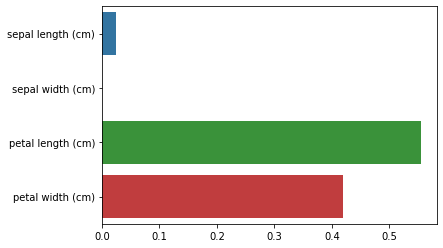

In [17]:
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

In [19]:
from sklearn.datasets import make_classification

In [27]:
X_features , y_labels = make_classification(n_features = 2, n_classes=3 , n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)

In [28]:
X_features.shape

(100, 2)

In [29]:
y_labels[:10]

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2])

In [23]:
#데이터가 많으니 그래프를 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

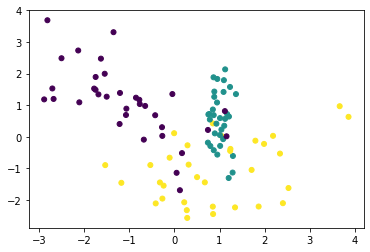

In [30]:
plt.scatter(X_features[:,0], X_features[:,1], c = y_labels, s=25)

In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features, y_labels)

DecisionTreeClassifier()

In [35]:
def visualize_boundary(model, X, y):
  fig, ax = plt.subplots()

  #학습데이터 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:,1], c=y , s=25, cmap='rainbow', edgecolor='k',
             clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  #호출 파라미터로 돌아온 training데이타로 model학습
  model.fit(X,y)
  #meshgrid 형태인 모든 좌표값으로 예측 수행.
  xx , yy = np.meshgrid(np.linspace(xlim_start, xlim_end , num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  #contourf() 를 이용하여 class boundary 를 visulaization수행
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels= np.arange(n_classes +1) - 0.5,
                         cmap= 'rainbow', clim=(y.min(), y.max()),
                         zorder=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


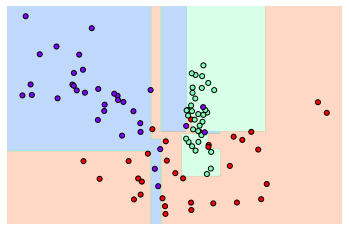

In [36]:
visualize_boundary(dt_clf, X_features, y_labels)

In [39]:
dt_clf = DecisionTreeClassifier(min_samples_split=6).fit(X_features, y_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


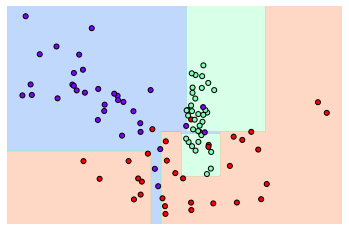

In [40]:
visualize_boundary(dt_clf, X_features, y_labels)#일반화 되어 있는 모델